## Import Pandas, Read Dataset, Explore this Data

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('ggplot')

In [58]:
# Read in data
df = pd.read_csv('Providence_Police_Department__Arrests_and_Citations-_Past_60_Days.csv')
df['Day'] = df['Arrest Date'].apply(lambda x: x.split()[0])
df['Time'] = df['Arrest Date'].apply(lambda x: ' '.join(x.split()[1:]))
df['General Law'] = df['Statute Code'].apply(lambda tit: str(tit).split('-')[0])
colnames=['Title', 'Description']
df_law = pd.read_csv('ri_general_laws.csv', names = colnames, header = None)
df_merged = pd.merge(df,df_law, how = 'left', left_on = 'General Law', right_on = 'Title')

In [4]:
# Take a peak into what the data looks like
print('rows and columns: ' , df.shape)
print('')
print('columns: ' , df.columns.tolist())
print('')
print('Statute Types in Data: ' , df['Statute Type'].unique())
print('')
print('Statute Codes in Data: \n', df['Statute Code'].unique())
print('')
print('null values:')
print(df.isnull().sum())
print(df.info())

rows and columns:  (934, 19)

columns:  ['Arrest Date', 'Year', 'Month', 'Last Name', 'First Name', 'Gender', 'Race', 'Ethnicity', 'Year of Birth', 'Age', 'From Address', 'From City', 'From State', 'Statute Type', 'Statute Code', 'Statute Desc', 'Counts', 'Case Number', 'Arresting Officers']

Statute Types in Data:  ['RI Statute Violation' nan 'Warrant\\Capias' 'Municipal Code Violation']

Statute Codes in Data: 
 ['11-5-3' '12-7-10' '11-5-5' '11-44-1' '11-47-8-A' '11-45-1' '31-11-18'
 '11-41-1' '31-9-3' '12-9-16' '15-15-3' nan '31-27-2' '12-29-4'
 'BWARRANT-SC' '21-28-4.01-C1A' '11-39-1' '11-1-6' 'BWARRANT-6D' '11-9-13'
 '11-37.1-3' '11-34-8' '31-26-2' '31-27-2.1' '11-44-28' '11-5-2.1'
 '31-9-2' '11-8-2' '11-47-24' 'Sec. 23-32.' '11-5-1' '11-39-2' '31-27-4'
 '11-5-2' 'Sec. 16-3.C' '31-10-1' '21-28-4.08' '21-28-4.01-A2A'
 '11-47-8-C' '11-47-5.2' '11-47-5' '11-44-26' '11-41-7' '11-41-20'
 '31-11-18.1' '11-35-14' '31-9-1' '11-41-2' '11-32-1' '11-8-2.3'
 'Sec. 16-3.A' '11-37-4' '11-9-5' '

## Date To Date Time Object

In [31]:
timestamp = df['Arrest Date'].iloc[0]
print(timestamp)
datetime.strptime(timestamp, '%m/%d/%Y %I:%M:%S %p' )

06/06/2022 11:30:00 AM


datetime.datetime(2022, 6, 6, 11, 30)

## Data Visualization

[Text(-100.0, 0, '10:25:00 AM'),
 Text(0.0, 0, '01:00:00 AM'),
 Text(100.0, 0, '03:15:00 AM'),
 Text(200.0, 0, '06:29:00 PM'),
 Text(300.0, 0, '09:23:00 PM'),
 Text(400.0, 0, '12:15:00 AM'),
 Text(500.0, 0, '')]

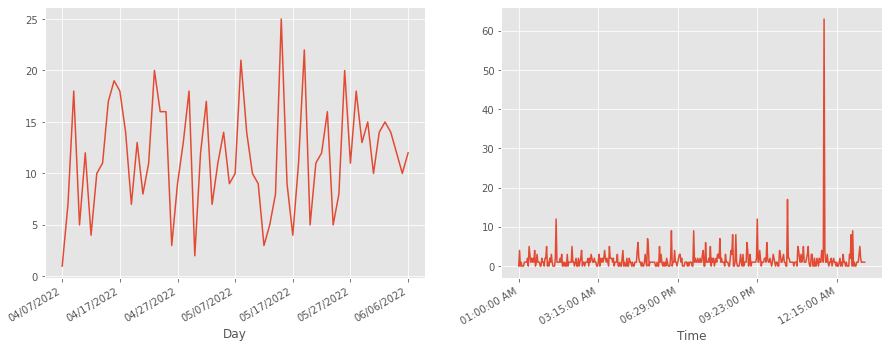

In [72]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
df.groupby(by = 'Day')['Counts'].sum().plot(ax = ax0)
ax.set(title = 'Number of Counts per Day', xlabel = 'Date', ylabel = 'Number of Counts')
df.groupby(by = 'Time')['Counts'].sum().plot(ax = ax1)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=30, ha='right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

Description
  Courts and Civil Procedure–Courts      2.0
  Criminal Offenses                    339.0
  Criminal Procedure                    55.0
  Domestic Relations                     4.0
  Fish and Wildlife                      1.0
  Food And Drugs                        55.0
  Human services                         1.0
  Motor and Other vehicles             151.0
Name: Counts, dtype: float64


<AxesSubplot:xlabel='Description'>

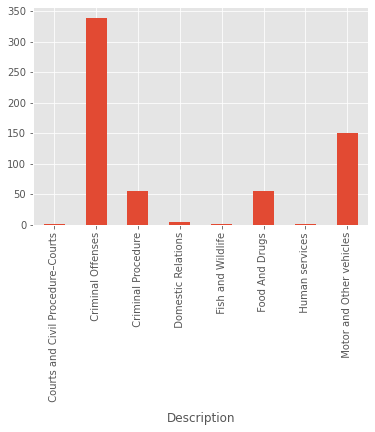

In [157]:
print(df_merged.groupby('Description')['Counts'].sum())
df_merged.groupby('Description')['Counts'].sum().plot(kind = 'bar')

In [164]:
# There should be a nicer way of comparing counts by race and statute type. 
# I am thinking plotting but it isn't formatted the way I would like.
# Understading the local demogtarphics might be important
df_merged.groupby(by = ['Description', 'Race']).sum()

Year  \
Description                         Race                                     
  Courts and Civil Procedure–Courts Black                             2022   
                                    White                             2022   
  Criminal Offenses                 Black                           323520   
                                    Unknown                          44484   
                                    White                           289146   
  Criminal Procedure                Black                            60660   
                                    Unknown                           2022   
                                    White                            46506   
  Domestic Relations                Black                             8088   
  Fish and Wildlife                 White                             2022   
  Food And Drugs                    Black                            52572   
                                    Unknown                           6066   
                                    White                            48528   
  Human services                    White                             2022   
  Motor and Other vehicles          American Indian/Alaskan Native    2022   
                                    Black                           115254   
                                    Unknown                          20220   
                                    White                           145584   

                                                                    Month  \
Description                         Race                                    
  Courts and Civil Procedure–Courts Black                               4   
                                    White                               4   
  Criminal Offenses                 Black                             740   
                                    Unknown                           105   
                                    White                             690   
  Criminal Procedure                Black                             139   
                                    Unknown                             4   
                                    White                             115   
  Domestic Relations                Black                              20   
  Fish and Wildlife                 White                               5   
  Food And Drugs                    Black                             122   
                                    Unknown                            13   
                                    White                             114   
  Human services                    White                               5   
  Motor and Other vehicles          American Indian/Alaskan Native      4   
                                    Black                             271   
                                    Unknown                            50   
                                    White                             359   

                                                                    Year of Birth  \
Description                         Race                                            
  Courts and Civil Procedure–Courts Black                                    1985   
                                    White                                    1974   
  Criminal Offenses                 Black                                  318427   
                                    Unknown                                 43826   
                                    White                                  283982   
  Criminal Procedure                Black                                   59806   
                                    Unknown                                  1987   
                                    White                                   45575   
  Domestic Relations                Black                                    7947   
  Fish and Wildlife              

In [106]:
# Time 
most = df.groupby(by = 'Time')['Counts'].sum().tolist().index(df.groupby(by = 'Time')['Counts'].sum().max())
df.groupby(by = 'Time')['Counts'].sum().to_frame().iloc[most]


Time
01:00:00 AM    0.0
01:00:00 PM    4.0
01:03:00 PM    0.0
01:04:00 AM    1.0
01:06:00 AM    0.0
              ... 
12:52:00 PM    1.0
12:53:00 AM    1.0
12:54:00 AM    1.0
12:55:00 PM    1.0
12:56:00 AM    1.0
Name: Counts, Length: 436, dtype: float64

## Junk

In [7]:
df['Statute Type'].unique()

array(['RI Statute Violation', nan, 'Warrant\\Capias',
       'Municipal Code Violation'], dtype=object)

In [4]:
df['From Address'].tolist()

['WEBSTER AVE',
 'RILL',
 'RILL',
 'RILL',
 'RIDGEWAY AVE',
 'FLOWER ST',
 'JOSLIN ST',
 'JOSLIN ST',
 'MILLER AVE',
 'CALIFORNIA AVE',
 'DANIEL AVE',
 'DANIEL AVE',
 'SEAMANS ST',
 'POCASSET AVE',
 'CHANDLER AVE',
 'CHANDLER AVE',
 'No Permanent Address',
 'AMERICA STREET ST',
 'ATWELLS AVE',
 'VERMONT AVE',
 'HARTFORD AVE',
 'CENTENNIAL ST',
 'SUMTER ST',
 'DEXTER ST',
 'CAMBRIDGE ST',
 'CAROLINA AVE',
 'CAROLINA AVE',
 'CAROLINA AVE',
 'RILL ST',
 'No Permanent Address',
 'No Permanent Address',
 'LINWOOD AVE',
 'LINWOOD AVE',
 'LEAH ST',
 'PUTNAM ST',
 'DODGE ST',
 nan,
 'SIGEL ST',
 'IMERA AVE',
 'MONTICELLO ST',
 'WESTFIELD ST',
 'NINIGRET AVE',
 'ATLANTIC AVE',
 'WAVERLY ST',
 'DARTMOUTH AVE',
 'DARTMOUTH AVE',
 'No Permanent Address',
 'DETROIT AVE',
 'CHAMBLY AVE',
 'No Permanent Address',
 'ANN ST',
 'VILLAGE ROAD',
 'VILLAGE ROAD',
 'No Permanent Address',
 'No Permanent Address',
 'ANN ST',
 'ANGELL ST',
 'MARGARET ST',
 'MARGARET ST',
 'HUNTINGTON AVE',
 'MAIN STREET',
 'R

In [32]:
df[df['Statute Type'].isnull()]

,Arrest Date,Year,Month,Last Name,First Name,Gender,Race,Ethnicity,Year of Birth,Age,From Address,From City,From State,Statute Type,Statute Code,Statute Desc,Counts,Case Number,Arresting Officers
17,06/05/2022 04:34:00 AM,2022,6,Gabriel,Joannie,Female,Black,NonHispanic,2001,21,AMERICA STREET ST,Providence,Rhode Island,NaN,NaN,NaN,NaN,2022-00044203,"Schiavulli, David/ Martinez, Daisy/ Wilson, Derek"
18,06/05/2022 03:17:00 AM,2022,6,Montgomery,Victorio,Male,Black,NonHispanic,1998,23,ATWELLS AVE,Providence,NaN,NaN,NaN,NaN,NaN,2022-00044203,"Schiavulli, David/ Subramaniam, Ajay/ Wilson, ..."
21,06/05/2022 02:22:00 AM,2022,6,LESSING,SIERRA,Female,White,NonHispanic,1993,29,CENTENNIAL ST,PASCOG,NaN,NaN,NaN,NaN,NaN,2022-00044188,"Leroux, Jonathan / Ayala, Nicholas"
22,06/05/2022 01:47:00 AM,2022,6,Correia,Jose,Male,White,NonHispanic,1969,52,SUMTER ST,Providence,NaN,NaN,NaN,NaN,NaN,2022-00044072,"Espanol, Hildenise"
28,06/04/2022 09:13:00 PM,2022,6,HERNANDEZ,DAVID,Male,White,Hispanic,1968,53,RILL ST,Providence,Rhode Island,NaN,NaN,NaN,NaN,2022-00044062,"Pesola, Michael/ Ayala, Nicholas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,04/09/2022 01:24:00 AM,2022,4,Francisco,Sandro,Male,White,Hispanic,1981,40,No Permanent Address,NaN,NaN,NaN,NaN,NaN,NaN,2022-00026196,"Carias, David/ Andrade, Mario"
921,04/09/2022 01:16:00 AM,2022,4,schwarz,ryan,Male,NaN,NaN,2002,19,WEST CEDAR PLACE,ramsey,NaN,NaN,NaN,NaN,NaN,2022-00026193,"Sollitto, Vincent/ Northup, Harrison"
923,04/08/2022 09:11:00 PM,2022,4,BROWN,DAVID,Male,Black,NonHispanic,1970,51,BROAD ST,Providence,NaN,NaN,NaN,NaN,NaN,2022-00026112,"Soloman, Erik/ Palumbo, David"
931,04/07/2022 06:01:00 PM,2022,4,PEREZ ORTIZ,JUAN,Male,White,Hispanic,1973,48,No Permanent Address,NaN,NaN,NaN,NaN,NaN,NaN,2022-00025784,"Heeder, Jenna"


In [62]:
df_statutes = df[['Statute Code', 'Statute Desc']].apply(lambda row: row['Statute Code'] + row['Statute Desc'], axis = 1)

In [63]:
df_statutes.unique()

array(['11-5-3SIMPLE ASSAULT OR BATTERY',
       '12-7-10RESISTING LEGAL OR ILLEGAL ARREST',
       '11-5-5ASSAULT OF POLICE OFFICERS AND OTHER OFFICIALS - SERIOUS INJURY',
       '11-44-1VANDALISM/MALICIOUS INJURY TO PROPERTY',
       '11-47-8-ALICENSE OR PERMIT REQUIRED FOR CARRYING PISTOL',
       '11-5-3DOMESTIC-SIMPLE ASSAULT/BATTERY',
       '11-45-1DOMESTIC-DISORDERLY CONDUCT',
       '31-11-18Driving after Denial, Suspension or Revocation of License',
       '11-41-1LARCENY/U $1500 - FROM MV',
       '31-9-3Injuring or Tampering with Vehicles',
       '12-9-16WARRANT OF ARREST ON AFFIDAVIT - ALL OTH OFFENSE',
       '11-44-1DOMESTIC-VANDALISM/MALICIOUS INJURY TO PROP',
       '15-15-3VIOLATION OF PROTECTIVE ORDER', nan,
       '31-27-2Driving Under the Influence of Liqour or Drugs (=>.08<.1)',
       '12-29-4VIOLATION -NO CONTACT ORDER', '11-45-1DISORDERLY CONDUCT',
       'BWARRANT-SCBENCH WARRANT ISSUED FROM SUPERIOR COURT',
       '21-28-4.01-C1APOSSESSION OF SCHEDULE I II I

In [53]:
df.groupby(by = 'Statute Code')['Statute Desc'].unique().tolist()

[array(['CONSPIRACY - ALL OTH OFFENSE'], dtype=object),
 array(['ENTICEMENT OF CHILDREN-SUB OFFENSE - KIDNAPING/ABDU'],
       dtype=object),
 array(['OBSTRUCTING OFFICER IN EXECUTION OF DUTY'], dtype=object),
 array(['LOITERING FOR INDECENT PURPOSES PROSTITUTION - PROSTITUTION'],
       dtype=object),
 array(['DOMESTIC-REFUSE/RELINQUISH TELEPHONE - W/DAMAG',
        'DOMESTIC-REFUSE/RELINQUISH TELEPHONE - W/O DMG',
        'REFUSE/RELINQUISH TELEPHONE - W/DAMAGE'], dtype=object),
 array(['SEXUAL ASSAULT -1ST DEGREE - FRC RAPE'], dtype=object),
 array(['SEXUAL ASSAULT - 2ND DEGREE'], dtype=object),
 array(['FIRST DEGREE CHILD MOLESTATION - FRC RAPE',
        'FIRST DEGREE CHILD MOLESTATION - FRC OBJ'], dtype=object),
 array(['SECOND DEGREE CHILD MOLESTATION'], dtype=object),
 array(['Indecent Solicitation of a Child'], dtype=object),
 array(['SEXUAL OFFENDER REGISTRATION REQUIRED'], dtype=object),
 array(['ROBBERY-1ST DEGREE', 'ROBBERY-2ND DEGREE'], dtype=object),
 array(['ROBBERY-OCCU

In [70]:
df_general_statutes = df['Statute Code'].apply(lambda x: str(x).split('-')[0])
df_general_statutes.unique()

array(['11', '12', '31', '15', 'nan', 'BWARRANT', '21', 'Sec. 23',
       'Sec. 16', '20', '40', '8'], dtype=object)

array(['11', '12', '31', '15', 'nan', 'BWARRANT', '21', 'Sec. 23',
       'Sec. 16', '20', '40', '8'], dtype=object)

In [71]:
df

,Arrest Date,Year,Month,Last Name,First Name,Gender,Race,Ethnicity,Year of Birth,Age,From Address,From City,From State,Statute Type,Statute Code,Statute Desc,Counts,Case Number,Arresting Officers
0,06/06/2022 11:30:00 AM,2022,6,LUCAS,ALEANNAH,Female,Black,NonHispanic,2003,19,WEBSTER AVE,Providence,NaN,RI Statute Violation,11-5-3,SIMPLE ASSAULT OR BATTERY,1.0,2022-00044617,NaN
1,06/06/2022 08:47:00 AM,2022,6,Silva,Vanessa,Female,Black,NonHispanic,1988,33,RILL,PROVIDENCE,NaN,RI Statute Violation,12-7-10,RESISTING LEGAL OR ILLEGAL ARREST,1.0,2022-00044585,"Majeau, Raymond/ Valletta, Giana / Lugo, Jeann"
2,06/06/2022 08:47:00 AM,2022,6,Silva,Vanessa,Female,Black,NonHispanic,1988,33,RILL,PROVIDENCE,NaN,RI Statute Violation,11-5-5,ASSAULT OF POLICE OFFICERS AND OTHER OFFICIALS...,1.0,2022-00044585,"Majeau, Raymond/ Valletta, Giana / Lugo, Jeann"
3,06/06/2022 08:47:00 AM,2022,6,Silva,Vanessa,Female,Black,NonHispanic,1988,33,RILL,PROVIDENCE,NaN,RI Statute Violation,11-44-1,VANDALISM/MALICIOUS INJURY TO PROPERTY,1.0,2022-00044585,"Majeau, Raymond/ Valletta, Giana / Lugo, Jeann"
4,06/06/2022 08:42:00 AM,2022,6,SIMS,JEFFREY,Male,Black,NonHispanic,1992,30,RIDGEWAY AVE,Providence,NaN,RI Statute Violation,11-47-8-A,LICENSE OR PERMIT REQUIRED FOR CARRYING PISTOL,1.0,2022-00044556,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,04/08/2022 10:20:00 AM,2022,4,Malone,Abrielle,Female,Black,NaN,1997,24,CRANSTON ST,Providence,Rhode Island,Municipal Code Violation,Sec. 16-3.A,Disorderly and indecent conduct A - Theatening,1.0,2022-00025922,"O, Jin"
930,04/08/2022 12:00:00 AM,2022,4,Damico,Michael,Male,Unknown,Unknown,1987,34,HALL ST,Providence,NaN,RI Statute Violation,12-29-4,VIOLATION -NO CONTACT ORDER,1.0,2022-00006679,NaN
931,04/07/2022 06:01:00 PM,2022,4,PEREZ ORTIZ,JUAN,Male,White,Hispanic,1973,48,No Permanent Address,NaN,NaN,NaN,NaN,NaN,NaN,2022-00025784,"Heeder, Jenna"
932,04/07/2022 05:50:00 PM,2022,4,NIEVES,JONATHAN,Male,White,Hispanic,1989,32,BRIDHAM ST,Q,Rhode Island,RI Statute Violation,31-11-18,"Driving after Denial, Suspension or Revocation...",1.0,2022-00025739,"Deschamps, Jose/ Lugo, Abraham"


In [81]:
df_from_state = df.groupby(by = 'From City')['From State'].unique().to_frame()
df_from_state.head(30)

,From State
From City,
BALDWIN,[nan]
BOSTON,[nan]
BOWIE,[nan]
BROCKTON,[nan]
BROOKLYN,[nan]
Barrington,[Rhode Island]
CAMBRIDGE,[nan]
CAMBRIDGE AVE,[nan]
CENTRAL FALL,[nan]


In [79]:
df['From City'].unique()

array(['Providence', 'PROVIDENCE', 'Pawtucket', 'Providencee', 'Johnston',
       'PASCOG', 'BOSTON', nan, 'Worcester', 'WARWICK', 'Woonsocket',
       'WOONSOCKET', 'Coventry', 'Mendon', 'CHEPACHET',
       'North Providence', 'Cranston', 'Shelby', 'RIVERSIDE',
       'EAST PROVIDENCE', 'Central Falls', 'providence', 'PAWTUCKET',
       'N. PROVIDENCE', 'TEWKSBURY', 'CAMBRIDGE', 'Warwick',
       'CENTRAL FALLS', 'HARTFORD', 'DENNISPORT', 'CRANSTON', 'warwick',
       'NORTH PROVIDENCE', 'HOLBROOK', 'Lynn', 'NORTH SCITUATE',
       'Barrington', 'West Warwick', 'WEST WARWICK', 'FALL RIVER',
       'Fall river', 'WEST WQARWICK', 'West Warrick', 'CENTRAL FALL',
       'Westely', 'Derry', 'LAWRENCE', 'LOWELL', 'CRANTON', 'RAYNHAM',
       'Rumford', 'Glen Cove', 'NEWPORT', 'wakefield', 'North Smithfield',
       'LINCOLN', 'North Kingstown', 'N PROVIDENCE', 'Exeter', 'BOWIE',
       'WORCHESTER', 'RIDGEWOOD', 'RUMFORD', 'Salan', 'cranston',
       'pawtucket', 'Roxbury', 'Plymouth', 'NEW

In [84]:
df[df['From City'] == 'Providence' ]

,Arrest Date,Year,Month,Last Name,First Name,Gender,Race,Ethnicity,Year of Birth,Age,From Address,From City,From State,Statute Type,Statute Code,Statute Desc,Counts,Case Number,Arresting Officers
0,06/06/2022 11:30:00 AM,2022,6,LUCAS,ALEANNAH,Female,Black,NonHispanic,2003,19,WEBSTER AVE,Providence,NaN,RI Statute Violation,11-5-3,SIMPLE ASSAULT OR BATTERY,1.0,2022-00044617,NaN
4,06/06/2022 08:42:00 AM,2022,6,SIMS,JEFFREY,Male,Black,NonHispanic,1992,30,RIDGEWAY AVE,Providence,NaN,RI Statute Violation,11-47-8-A,LICENSE OR PERMIT REQUIRED FOR CARRYING PISTOL,1.0,2022-00044556,NaN
5,06/06/2022 07:01:00 AM,2022,6,Melo Tejeda,Johan,Male,White,Hispanic,1984,37,FLOWER ST,Providence,NaN,RI Statute Violation,11-5-3,DOMESTIC-SIMPLE ASSAULT/BATTERY,1.0,2022-00044563,"Dalton, Jason/ Lugo, Jeann"
6,06/06/2022 06:05:00 AM,2022,6,Shriver,Javier,Male,White,Hispanic,1984,38,JOSLIN ST,Providence,NaN,RI Statute Violation,11-5-3,DOMESTIC-SIMPLE ASSAULT/BATTERY,1.0,2022-00034604,"Shields, Derek"
7,06/06/2022 06:05:00 AM,2022,6,Shriver,Javier,Male,White,Hispanic,1984,38,JOSLIN ST,Providence,NaN,RI Statute Violation,11-45-1,DOMESTIC-DISORDERLY CONDUCT,1.0,2022-00034604,"Shields, Derek"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,04/08/2022 10:20:00 AM,2022,4,Malone,Abrielle,Female,Black,NaN,1997,24,CRANSTON ST,Providence,Rhode Island,RI Statute Violation,12-7-10,RESISTING LEGAL OR ILLEGAL ARREST,1.0,2022-00025922,"O, Jin"
928,04/08/2022 10:20:00 AM,2022,4,Malone,Abrielle,Female,Black,NaN,1997,24,CRANSTON ST,Providence,Rhode Island,RI Statute Violation,11-5-3,SIMPLE ASSAULT OR BATTERY,1.0,2022-00025922,"O, Jin"
929,04/08/2022 10:20:00 AM,2022,4,Malone,Abrielle,Female,Black,NaN,1997,24,CRANSTON ST,Providence,Rhode Island,Municipal Code Violation,Sec. 16-3.A,Disorderly and indecent conduct A - Theatening,1.0,2022-00025922,"O, Jin"
930,04/08/2022 12:00:00 AM,2022,4,Damico,Michael,Male,Unknown,Unknown,1987,34,HALL ST,Providence,NaN,RI Statute Violation,12-29-4,VIOLATION -NO CONTACT ORDER,1.0,2022-00006679,NaN


In [89]:
df[df['Age'] == 74]

,Arrest Date,Year,Month,Last Name,First Name,Gender,Race,Ethnicity,Year of Birth,Age,From Address,From City,From State,Statute Type,Statute Code,Statute Desc,Counts,Case Number,Arresting Officers
154,05/28/2022 08:21:00 PM,2022,5,Horsley,William,Male,Black,NonHispanic,1948,74,ATLANTIC AVE,Providence,NaN,NaN,NaN,NaN,NaN,2022-00041649,"Hernandez Martinez, Darlin"
